In [1]:
import numpy
import os
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential, Model
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras import backend as k
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping

/Users/rsahani/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


### 1. Load Test and Train Files

In [2]:
files_train = 0
files_validation = 0

cwd = os.getcwd()
folder = 'train_data/train'
for sub_folder in os.listdir(folder):
    path, dirs, files = next(os.walk(os.path.join(folder,sub_folder)))
    files_train += len(files)


folder = 'train_data/test'
for sub_folder in os.listdir(folder):
    path, dirs, files = next(os.walk(os.path.join(folder,sub_folder)))
    files_validation += len(files)

print(files_train,files_validation)

381 164


### 2. Set key parameters

In [3]:
img_width, img_height = 48, 48
train_data_dir = "train_data/train"
validation_data_dir = "train_data/test"
nb_train_samples = files_train
nb_validation_samples = files_validation
batch_size = 32
epochs = 15
num_classes = 2

### 3. Build model on top of a trained VGG

In [4]:
model = applications.VGG16(weights = "imagenet", include_top=False, input_shape = (img_width, img_height, 3))
# Freeze the layers which you don't want to train. Here I am freezing the first 5 layers.
for layer in model.layers[:10]:
    layer.trainable = False

58889256/58889256 [==============================] - 5s 0us/step


In [7]:
x = model.output
x = Flatten()(x)

# Add additional layers if needed
# x = Dense(512, activation="relu")(x)
# x = Dropout(0.5)(x)
# x = Dense(256, activation="relu")(x)
# x = Dropout(0.5)(x)

predictions = Dense(num_classes, activation="softmax")(x)

# Creating the final model
model_final = Model(inputs=model.input, outputs=predictions)

# Compile the model
model_final.compile(loss="categorical_crossentropy", 
                    optimizer=optimizers.SGD(lr=0.0001, momentum=0.9), 
                    metrics=["accuracy"])


In [8]:
# Initiate the train and test generators with data Augumentation
train_datagen = ImageDataGenerator(
rescale = 1./255,
horizontal_flip = True,
fill_mode = "nearest",
zoom_range = 0.1,
width_shift_range = 0.1,
height_shift_range=0.1,
rotation_range=5)

test_datagen = ImageDataGenerator(
rescale = 1./255,
horizontal_flip = True,
fill_mode = "nearest",
zoom_range = 0.1,
width_shift_range = 0.1,
height_shift_range=0.1,
rotation_range=5)

train_generator = train_datagen.flow_from_directory(
train_data_dir,
target_size = (img_height, img_width),
batch_size = batch_size,
class_mode = "categorical")

validation_generator = test_datagen.flow_from_directory(
validation_data_dir,
target_size = (img_height, img_width),
class_mode = "categorical")

Found 381 images belonging to 2 classes.
Found 164 images belonging to 2 classes.


In [14]:
# Save the model according to the conditions
checkpoint = ModelCheckpoint("car1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=10, verbose=1, mode='auto')


In [15]:
### Start training!

history_object = model_final.fit_generator(
train_generator,
# samples_per_epoch = nb_train_samples,
epochs = epochs,
validation_data = validation_generator,
# nb_val_samples = nb_validation_samples,
callbacks = [checkpoint, early])

Epoch 1/15


/var/folders/jm/l7z1pz590c340yqzvk57pbw00000gn/T/ipykernel_24617/2456076853.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_object = model_final.fit_generator(


12/12 [==============================] - ETA: 0s - loss: 0.0956 - accuracy: 0.9711WARNING:tensorflow:Can save best model only with val_acc available, skipping.


12/12 [==============================] - 6s 467ms/step - loss: 0.0956 - accuracy: 0.9711 - val_loss: 0.5096 - val_accuracy: 0.9085
Epoch 2/15
12/12 [==============================] - ETA: 0s - loss: 0.0819 - accuracy: 0.9790WARNING:tensorflow:Can save best model only with val_acc available, skipping.


12/12 [==============================] - 6s 471ms/step - loss: 0.0819 - accuracy: 0.9790 - val_loss: 0.1926 - val_accuracy: 0.9512
Epoch 3/15
12/12 [==============================] - ETA: 0s - loss: 0.0613 - accuracy: 0.9816WARNING:tensorflow:Can save best model only with val_acc available, skipping.


12/12 [==============================] - 6s 515ms/step - loss: 0.0613 - accuracy: 0.9816 - val_loss: 0.1464 - val_accuracy: 0.9573
Epoch 4/15
12/12 [==============================] - ETA: 0s - loss: 0.1203 - accuracy: 0.9711WARNING:tensorflow:Can save best model only with val_acc available, skipping.


12/12 [==============================] - 6s 512ms/step - loss: 0.1203 - accuracy: 0.9711 - val_loss: 0.1354 - val_accuracy: 0.9329
Epoch 5/15
12/12 [==============================] - ETA: 0s - loss: 0.0722 - accuracy: 0.9764WARNING:tensorflow:Can save best model only with val_acc available, skipping.


12/12 [==============================] - 6s 519ms/step - loss: 0.0722 - accuracy: 0.9764 - val_loss: 0.6106 - val_accuracy: 0.9024
Epoch 6/15
12/12 [==============================] - ETA: 0s - loss: 0.0807 - accuracy: 0.9764WARNING:tensorflow:Can save best model only with val_acc available, skipping.


12/12 [==============================] - 7s 570ms/step - loss: 0.0807 - accuracy: 0.9764 - val_loss: 0.2010 - val_accuracy: 0.9085
Epoch 7/15
12/12 [==============================] - ETA: 0s - loss: 0.0658 - accuracy: 0.9685WARNING:tensorflow:Can save best model only with val_acc available, skipping.


12/12 [==============================] - 6s 516ms/step - loss: 0.0658 - accuracy: 0.9685 - val_loss: 0.1156 - val_accuracy: 0.9512
Epoch 8/15
12/12 [==============================] - ETA: 0s - loss: 0.0415 - accuracy: 0.9816WARNING:tensorflow:Can save best model only with val_acc available, skipping.


12/12 [==============================] - 7s 552ms/step - loss: 0.0415 - accuracy: 0.9816 - val_loss: 0.1347 - val_accuracy: 0.9573
Epoch 9/15
12/12 [==============================] - ETA: 0s - loss: 0.0285 - accuracy: 0.9921WARNING:tensorflow:Can save best model only with val_acc available, skipping.


12/12 [==============================] - 6s 512ms/step - loss: 0.0285 - accuracy: 0.9921 - val_loss: 0.2327 - val_accuracy: 0.9268
Epoch 10/15
12/12 [==============================] - ETA: 0s - loss: 0.0260 - accuracy: 0.9948WARNING:tensorflow:Can save best model only with val_acc available, skipping.


12/12 [==============================] - 7s 587ms/step - loss: 0.0260 - accuracy: 0.9948 - val_loss: 0.1122 - val_accuracy: 0.9634
Epoch 11/15
12/12 [==============================] - ETA: 0s - loss: 0.0477 - accuracy: 0.9843WARNING:tensorflow:Can save best model only with val_acc available, skipping.


12/12 [==============================] - 7s 564ms/step - loss: 0.0477 - accuracy: 0.9843 - val_loss: 0.0861 - val_accuracy: 0.9451
Epoch 12/15
12/12 [==============================] - ETA: 0s - loss: 0.0194 - accuracy: 0.9921WARNING:tensorflow:Can save best model only with val_acc available, skipping.


12/12 [==============================] - 6s 541ms/step - loss: 0.0194 - accuracy: 0.9921 - val_loss: 0.4039 - val_accuracy: 0.9024
Epoch 13/15
12/12 [==============================] - ETA: 0s - loss: 0.0428 - accuracy: 0.9921WARNING:tensorflow:Can save best model only with val_acc available, skipping.


12/12 [==============================] - 7s 549ms/step - loss: 0.0428 - accuracy: 0.9921 - val_loss: 0.0867 - val_accuracy: 0.9695
Epoch 14/15
12/12 [==============================] - ETA: 0s - loss: 0.0168 - accuracy: 0.9948WARNING:tensorflow:Can save best model only with val_acc available, skipping.


12/12 [==============================] - 6s 538ms/step - loss: 0.0168 - accuracy: 0.9948 - val_loss: 0.2303 - val_accuracy: 0.9268
Epoch 15/15
12/12 [==============================] - ETA: 0s - loss: 0.0288 - accuracy: 0.9869WARNING:tensorflow:Can save best model only with val_acc available, skipping.


12/12 [==============================] - 6s 545ms/step - loss: 0.0288 - accuracy: 0.9869 - val_loss: 0.1197 - val_accuracy: 0.9512


In [16]:
# Save the trained model
model_final.save("car1.h5")

/Users/rsahani/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [17]:
import matplotlib.pyplot as plt
print(history_object.history.keys())
plt.plot(history_object.history['acc'])
plt.plot(history_object.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


KeyError: 'acc'

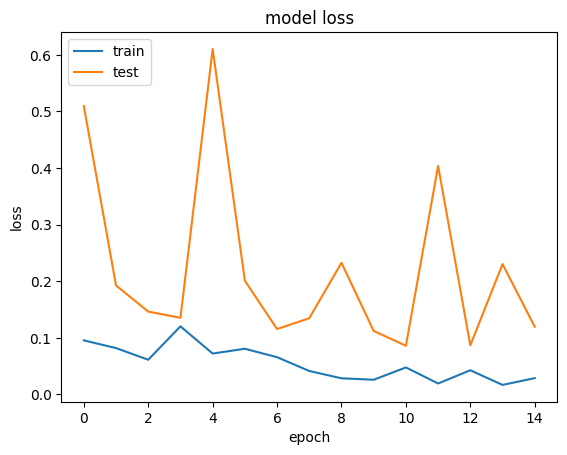

In [18]:
plt.plot(history_object.history['loss'])
plt.plot(history_object.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()